# **Node Embedding**


High Energy Physics Author Collaoration Data-set

In [9]:
!pip install node2vec

In [0]:
import networkx as nx
from node2vec import Node2Vec
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from random import randint
from sklearn.manifold import TSNE

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
G = nx.read_edgelist('/content/drive/My Drive/data/AuthorCollaboration.txt', delimiter="\t", create_using = nx.Graph(),nodetype = str)

df = pd.read_csv('/content/drive/My Drive/data/HEPcommunity.csv', usecols=['Node', 'Community'])
df.columns = list(map(str.lower, df.columns))
a = df['community']

In [13]:
node2vec = Node2Vec(G, dimensions=20, walk_length=16, num_walks=100, workers=2)

fix_formatted_positions = lambda x: x.split('_')[0] if x in G else x
reformatted_walks = [list(map(fix_formatted_positions, walk)) for walk in node2vec.walks]
node2vec.walks = reformatted_walks

model = node2vec.fit(window=10, min_count=1)



Computing transition probabilities: 100%|██████████| 13654/13654 [00:02<00:00, 5110.96it/s]


In [0]:
player_nodes = [x for x in model.wv.vocab]
embeddings = np.array([model.wv[x] for x in player_nodes])

tsne = TSNE(n_components=2, random_state=7, perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)

In [0]:
team_colors = {}
maximum = df['community'].max()
for items in range(maximum+1):
    team_colors[items] = (randint(0,255))

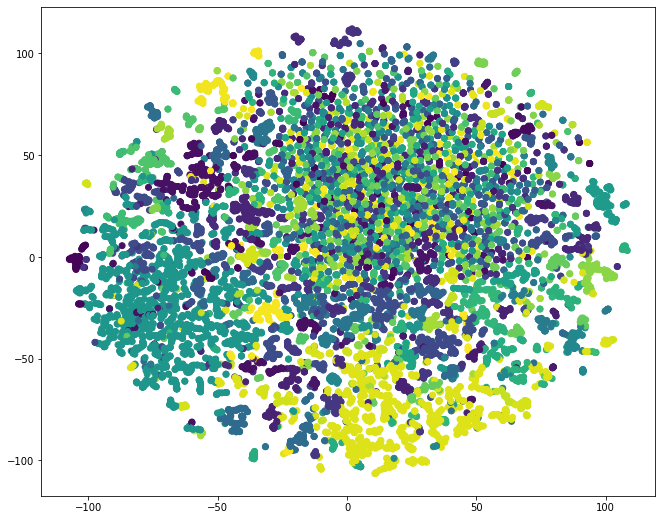

In [16]:
df['color'] = df['community'].apply(lambda x: team_colors[x])
player_colors = dict(zip(df['node'], df['color']))
#print (player_colors)
player_nodes = [ str(x) for x in player_nodes ]
colors = [player_colors[x] for x in player_nodes]

figure = plt.figure(figsize=(11, 9))

ax = figure.add_subplot(111)

ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)

figure.savefig('/content/drive/My Drive/data/HEPAuthor.png')